# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m = 1
A = 0.0492646484375#0.001#0.049375#5#0.0492645084166179#0.049264507293701174#0.049264508247375494#0.04925#0.0493#0.001#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [2]:
global loggrid=true#true
global bisection=false
global meshrefinement=false;

In [3]:
using Quadmath, Printf

res=m;
N=2.0^m*1000.0/2.0#Nt=2.0^m*1000.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*1000.0/2.0#Nt=2.0^m*1000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [4]:
print(N)

1000.0

In [5]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.001
dt =0.0001
dx/dt =10.0


In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA" #~/data/ritapsantos/
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [7]:
using Printf
include("./ScalarField.jl");

In [8]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.001
the time step is 0.0001


# Initial data of m β Ψ and Ψ,x

In [9]:
using Dierckx
using Quadmath


####
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [10]:
y0=[0 0 0]

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

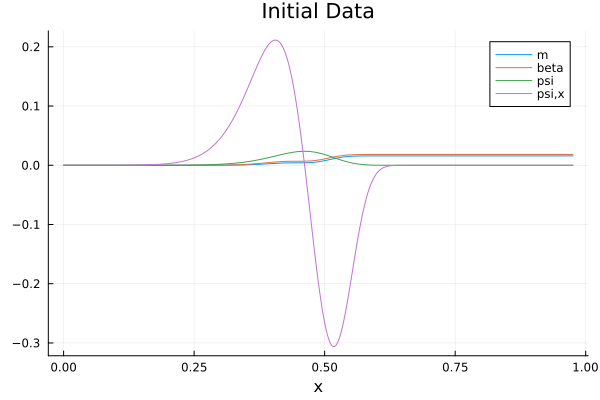

In [11]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [12]:
using CSV, Tables, Printf
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [13]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [14]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.019986015485363374


In [15]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

In [16]:
#global dt = 5e-5/2/2/2 #RES3
#global dt = 5e-5/2/2

fixed grid

In [ ]:
finaltime=1.3#1.6#2#1.3#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,run);#timeevolution(state_array,finaltime,dir*"/res$res",run,auxstate_array);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);



iteration 500 dt is 1.9986015485363374e-6, t=0.0009993007742681733 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 1000 dt is 1.9986015485363374e-6, t=0.0019986015485363036 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 1500 dt is 1.9986015485363374e-6, t=0.002997902322804434 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 2000 dt is 1.9986015485363374e-6, t=0.003997203097072565 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 2500 dt is 1.9986015485363374e-6, t=0.004996503871340695 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 3000 dt is 1.9986015485363374e-6, t=0.0059958046456088255 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 3500 dt is 1.9986015485363374e-6, t=0.006995105419876956 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 4000 dt is 1.9986015485363374e-6, t=0.007994406194145086 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 45



iteration 34000 dt is 1.9986015485363374e-6, t=0.06795245265023292 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 34500 dt is 1.9986015485363374e-6, t=0.06895175342450105 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 35000 dt is 1.9986015485363374e-6, t=0.06995105419876918 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 35500 dt is 1.9986015485363374e-6, t=0.07095035497303731 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 36000 dt is 1.9986015485363374e-6, t=0.07194965574730544 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 36500 dt is 1.9986015485363374e-6, t=0.07294895652157357 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 37000 dt is 1.9986015485363374e-6, t=0.0739482572958417 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 37500 dt is 1.9986015485363374e-6, t=0.07494755807010983 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 38000



iteration 67500 dt is 1.9986015485363374e-6, t=0.13490560452619765 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 68000 dt is 1.9986015485363374e-6, t=0.13590490530046578 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 68500 dt is 1.9986015485363374e-6, t=0.13690420607473391 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 69000 dt is 1.9986015485363374e-6, t=0.13790350684900204 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 69500 dt is 1.9986015485363374e-6, t=0.13890280762327017 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 70000 dt is 1.9986015485363374e-6, t=0.1399021083975383 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 70500 dt is 1.9986015485363374e-6, t=0.14090140917180644 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 71000 dt is 1.9986015485363374e-6, t=0.14190070994607457 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 71500



iteration 101000 dt is 1.998601548536337e-6, t=0.2018587564021624 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 101500 dt is 1.998601548536337e-6, t=0.20285805717643052 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 102000 dt is 1.998601548536337e-6, t=0.20385735795069865 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 102500 dt is 1.998601548536337e-6, t=0.20485665872496678 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 103000 dt is 1.998601548536337e-6, t=0.2058559594992349 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 103500 dt is 1.998601548536337e-6, t=0.20685526027350304 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration 104000 dt is 1.9986015485363374e-6, t=0.20785456104777117 speed is 0.4999980014084374, dx/dt=500.34985749527885


iteration 104500 dt is 1.998601548536337e-6, t=0.2088538618220393 speed is 0.49999800140843753, dx/dt=500.34985749527897


iteration



iteration 134500 dt is 1.998601548536333e-6, t=0.2688119082781271 speed is 0.4999980014084385, dx/dt=500.3498574952799


iteration 135000 dt is 1.9986015485363327e-6, t=0.26981120905239525 speed is 0.4999980014084386, dx/dt=500.34985749528


iteration 135500 dt is 1.998601548536333e-6, t=0.2708105098266634 speed is 0.4999980014084385, dx/dt=500.3498574952799


iteration 136000 dt is 1.9986015485363327e-6, t=0.2718098106009315 speed is 0.4999980014084386, dx/dt=500.34985749528


iteration 136500 dt is 1.9986015485363323e-6, t=0.27280911137519964 speed is 0.4999980014084387, dx/dt=500.3498574952801


iteration 137000 dt is 1.998601548536332e-6, t=0.2738084121494678 speed is 0.4999980014084388, dx/dt=500.3498574952802


iteration 137500 dt is 1.998601548536332e-6, t=0.2748077129237359 speed is 0.4999980014084388, dx/dt=500.3498574952802


iteration 138000 dt is 1.998601548536332e-6, t=0.27580701369800403 speed is 0.4999980014084388, dx/dt=500.3498574952802


iteration 138500 dt is 1.998



iteration 168000 dt is 1.9986015485362976e-6, t=0.33576506015409185 speed is 0.4999980014084474, dx/dt=500.3498574952888


iteration 168500 dt is 1.9986015485362967e-6, t=0.33676436092836 speed is 0.4999980014084476, dx/dt=500.34985749528903


iteration 169000 dt is 1.9986015485362954e-6, t=0.3377636617026281 speed is 0.4999980014084479, dx/dt=500.3498574952893


iteration 169500 dt is 1.9986015485362937e-6, t=0.33876296247689625 speed is 0.49999800140844836, dx/dt=500.34985749528977


iteration 170000 dt is 1.998601548536292e-6, t=0.3397622632511644 speed is 0.4999980014084487, dx/dt=500.34985749529017


iteration 170500 dt is 1.9986015485362908e-6, t=0.3407615640254325 speed is 0.4999980014084491, dx/dt=500.3498574952905


iteration 171000 dt is 1.9986015485362895e-6, t=0.34176086479970064 speed is 0.4999980014084494, dx/dt=500.34985749529085


iteration 171500 dt is 1.9986015485362874e-6, t=0.34276016557396877 speed is 0.49999800140844985, dx/dt=500.34985749529136


iteration 1720



iteration 201500 dt is 1.99860154853603e-6, t=0.4027182120300566 speed is 0.49999800140851436, dx/dt=500.3498574953558


iteration 202000 dt is 1.998601548536021e-6, t=0.4037175128043247 speed is 0.4999980014085166, dx/dt=500.34985749535804


iteration 202500 dt is 1.9986015485360117e-6, t=0.40471681357859285 speed is 0.4999980014085189, dx/dt=500.34985749536037


iteration 203000 dt is 1.998601548536002e-6, t=0.405716114352861 speed is 0.49999800140852135, dx/dt=500.3498574953628


iteration 203500 dt is 1.998601548535992e-6, t=0.4067154151271291 speed is 0.4999980014085238, dx/dt=500.34985749536526


iteration 204000 dt is 1.998601548535982e-6, t=0.40771471590139724 speed is 0.49999800140852635, dx/dt=500.3498574953678


iteration 204500 dt is 1.9986015485359714e-6, t=0.40871401667566537 speed is 0.49999800140852896, dx/dt=500.34985749537043


iteration 205000 dt is 1.9986015485359604e-6, t=0.4097133174499335 speed is 0.49999800140853173, dx/dt=500.3498574953732


iteration 205500 



iteration 235000 dt is 1.9986015485343333e-6, t=0.4696713639060213 speed is 0.4999980014089388, dx/dt=500.34985749578055


iteration 235500 dt is 1.998601548534279e-6, t=0.47067066468028945 speed is 0.4999980014089523, dx/dt=500.34985749579414


iteration 236000 dt is 1.9986015485342236e-6, t=0.4716699654545576 speed is 0.4999980014089662, dx/dt=500.349857495808


iteration 236500 dt is 1.9986015485341673e-6, t=0.4726692662288257 speed is 0.4999980014089803, dx/dt=500.3498574958221


iteration 237000 dt is 1.9986015485341092e-6, t=0.47366856700309384 speed is 0.49999800140899486, dx/dt=500.34985749583666


iteration 237500 dt is 1.9986015485340495e-6, t=0.474667867777362 speed is 0.4999980014090098, dx/dt=500.3498574958516


iteration 238000 dt is 1.9986015485339885e-6, t=0.4756671685516301 speed is 0.49999800140902506, dx/dt=500.34985749586684


iteration 238500 dt is 1.9986015485339263e-6, t=0.47666646932589823 speed is 0.4999980014090406, dx/dt=500.3498574958825


iteration 239000



iteration 268500 dt is 1.9986015485256423e-6, t=0.5366245157809688 speed is 0.49999800141111306, dx/dt=500.34985749795635


iteration 269000 dt is 1.998601548525391e-6, t=0.5376238165552092 speed is 0.4999980014111759, dx/dt=500.3498574980192


iteration 269500 dt is 1.998601548525134e-6, t=0.5386231173294496 speed is 0.4999980014112401, dx/dt=500.34985749808357


iteration 270000 dt is 1.9986015485248724e-6, t=0.5396224181036899 speed is 0.4999980014113057, dx/dt=500.3498574981491


iteration 270500 dt is 1.998601548524605e-6, t=0.5406217188779303 speed is 0.49999800141137246, dx/dt=500.349857498216


iteration 271000 dt is 1.998601548524333e-6, t=0.5416210196521707 speed is 0.4999980014114407, dx/dt=500.34985749828417


iteration 271500 dt is 1.9986015485240537e-6, t=0.5426203204264111 speed is 0.4999980014115104, dx/dt=500.3498574983541


iteration 272000 dt is 1.998601548523769e-6, t=0.5436196212006514 speed is 0.4999980014115816, dx/dt=500.3498574984253


iteration 272500 dt is 



iteration 302500 dt is 1.998601548491504e-6, t=0.6045769684293143 speed is 0.49999800141965356, dx/dt=500.3498575065029


iteration 303000 dt is 1.998601548490664e-6, t=0.6055762692035547 speed is 0.49999800141986367, dx/dt=500.34985750671314


iteration 303500 dt is 1.9986015484898115e-6, t=0.606575569977795 speed is 0.49999800142007694, dx/dt=500.3498575069266


iteration 304000 dt is 1.9986015484889467e-6, t=0.6075748707520354 speed is 0.4999980014202933, dx/dt=500.3498575071431


iteration 304500 dt is 1.9986015484880705e-6, t=0.6085741715262758 speed is 0.49999800142051254, dx/dt=500.34985750736246


iteration 305000 dt is 1.9986015484871823e-6, t=0.6095734723005162 speed is 0.49999800142073475, dx/dt=500.3498575075848


iteration 305500 dt is 1.998601548486282e-6, t=0.6105727730747565 speed is 0.49999800142095996, dx/dt=500.3498575078102


iteration 306000 dt is 1.9986015484853693e-6, t=0.6115720738489969 speed is 0.49999800142118833, dx/dt=500.3498575080387


iteration 306500 

 ## Movie of the evolution

In [96]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:100:3800#870
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    
    #functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/bisectionsearch/run1"*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

LoadError: BoundsError: attempt to access 207-element Vector{Float64} at index [4:4004]

In [115]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

# New test

In [237]:
include("./ScalarField.jl");

function ff(x)

    return x^2

end
function grid(x)

    return(1/2+1/2*cos(pi*(1-0.9*x)))

end;

In [238]:
res=1

dx=0.1

x=range(-3*dx,1+3*dx,step=dx)

y=ff.(x);

In [239]:
L=length(x)

aux=zeros(L)


for i in 4:L-3

    aux[i]=Dertest(y,i,x)

end

println(aux[4:L-3]);
xnew=grid.(x)
ynew=ff.(xnew);

[3.469446951953615e-16, 0.19999999999999996, 0.3999999999999998, 0.6000000000000004, 0.8, 1.0, 1.2, 1.3999999999999995, 1.6000000000000003, 1.8000000000000018, 1.9999999999999978]


In [240]:
spl=Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)
auxnew=zeros(L);

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,xnew,spl)
end

println(" ")
println(auxnew[4:L-3])
println(" ")
println(2 .* xnew[4:L-3])

WWWWWWWWWWWWWWWWWWWWAAAAAAAAA 
[1.8494949330273436e-15, 0.043885351791287275, 0.15567207449798512, 0.33868813467634756, 0.5742207084349278, 0.8435655349597687, 1.1253332335643045, 1.3971478906347807, 1.6374239897486917, 1.8270805742745604, 1.9510565162951545]
 
[0.0, 0.039706314323056935, 0.15567207449798492, 0.3386881346763483, 0.5742207084349277, 0.8435655349597689, 1.1253332335643045, 1.3971478906347805, 1.63742398974869, 1.8270805742745622, 1.9510565162951536]


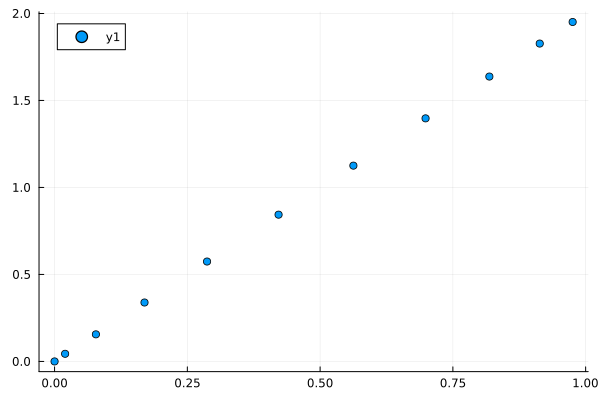

In [243]:

#plot(x,y)

scatter(xnew[4:L-3],auxnew[4:L-3])#,xlim=[0,0.2])

#plot(x[4:L-3],aux[4:L-3])

In [242]:
auxnew[L-3]

1.9510565162951545